In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_application = pd.read_csv('application_data.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_previous_application = pd.read_csv('previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
def Missing_Values(dataframe):
    return
    round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending = False),3)
Missing_Values(df_application)

In [6]:
missing_values = Missing_Values(df_application)
null_values = None  # define null_values with a default value of None
if missing_values is not None and missing_values > 50:
    null_values = df_application.isnull().sum()
    null_values = null_values[null_values > 0]
if null_values is not None:  # check if null_values is defined before printing
    print(null_values.index)

In [7]:
df_application.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

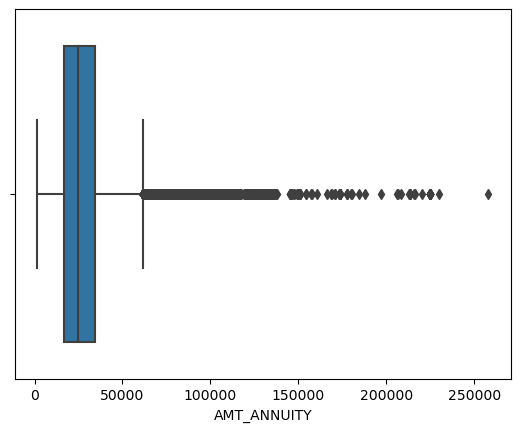

In [8]:
sns.boxplot(df_application.AMT_ANNUITY)
plt.show()

In [9]:
df_application['AMT_ANNUITY'] = df_application.AMT_ANNUITY.fillna(df_application.AMT_ANNUITY.median())
df_application.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

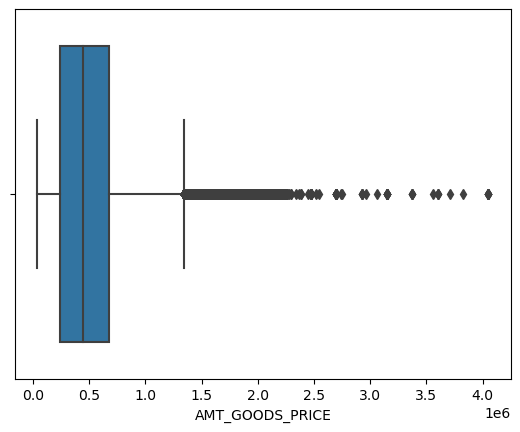

In [10]:
sns.boxplot(df_application['AMT_GOODS_PRICE'])
plt.show()

In [11]:
df_application["AMT_GOODS_PRICE"] = df_application.AMT_GOODS_PRICE.fillna(df_application['AMT_GOODS_PRICE'] == df_application['AMT_CREDIT'])
df_application['NAME_TYPE_SUITE'].isna().sum()

1292

In [12]:
df_application["NAME_TYPE_SUITE"] = df_application.NAME_TYPE_SUITE.fillna("Unaccompanied")
df_application.CNT_FAM_MEMBERS.isna().sum()

2

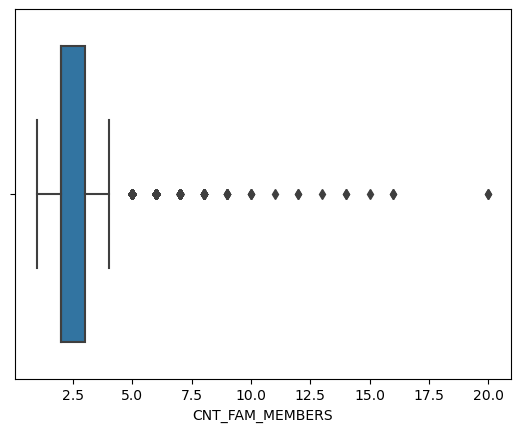

In [13]:
sns.boxplot(df_application['CNT_FAM_MEMBERS'])
plt.show()

In [14]:
df_previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [15]:
Missing_Values(df_previous_application)

In [16]:
df_previous_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
df_previous_application['NAME_TYPE_SUITE'] = df_previous_application.NAME_TYPE_SUITE.fillna('Unaccompanied')
df_previous_application["AMT_GOODS_PRICE"] = df_previous_application.AMT_GOODS_PRICE.fillna(df_previous_application['AMT_GOODS_PRICE'] == df_previous_application['AMT_CREDIT'])
df_previous_application['AMT_ANNUITY'] = df_previous_application.AMT_ANNUITY.fillna(df_previous_application.AMT_ANNUITY.median())
df_previous_application.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [18]:
df_previous_application['PRODUCT_COMBINATION'] = df_previous_application.PRODUCT_COMBINATION.fillna(df_previous_application.PRODUCT_COMBINATION.mode()[0])

In [19]:
df_previous_application['CNT_PAYMENT'] = df_previous_application.CNT_PAYMENT.fillna(df_previous_application.CNT_PAYMENT.median())
Missing_Values(df_previous_application)

In [20]:
df_application[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]] =abs(df_application[["DAYS_BIRTH", "DAYS_EMPLOYED",
"DAYS_REGISTRATION", "DAYS_ID_PUBLISH",
"DAYS_LAST_PHONE_CHANGE"]])

In [21]:
df_application['AGE_IN_YEARS'] = round(df_application['DAYS_BIRTH']/365,2)
df_application['EMPLOYMENT_YEARS'] = round(df_application['DAYS_EMPLOYED']/365,2)

In [22]:
df_application['AGE_IN_YEARS_RANGE'] = pd.cut(df_application['AGE_IN_YEARS'],bins=[0,20,25,30,35,40,45,50,55,60,65,70],labels=['0-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','above 65'])
df_application[['AGE_IN_YEARS_RANGE','AGE_IN_YEARS']]                                                                                                                              

,AGE_IN_YEARS_RANGE,AGE_IN_YEARS
0,25-30,25.92
1,45-50,45.93
2,50-55,52.18
3,50-55,52.07
4,50-55,54.61
...,...,...
307506,25-30,25.55
307507,55-60,56.92
307508,40-45,41.00
307509,30-35,32.77


In [23]:
df_application['EMPLOYMENT_YEARS_RANGE'] = pd.cut(df_application['EMPLOYMENT_YEARS'],bins=[0,5,10,15,20,25,30,35,40,45,50,55],labels=["0-5",'5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','above 50'])
df_application[['EMPLOYMENT_YEARS_RANGE','EMPLOYMENT_YEARS']]

,EMPLOYMENT_YEARS_RANGE,EMPLOYMENT_YEARS
0,0-5,1.75
1,0-5,3.25
2,0-5,0.62
3,5-10,8.33
4,5-10,8.32
...,...,...
307506,0-5,0.65
307507,NaN,1000.67
307508,20-25,21.70
307509,10-15,13.11


In [24]:
df_application['AMT_INCOME_TOTAL_in_lakhs'] = round(df_application['AMT_INCOME_TOTAL']/100000,2)
df_application['AMT_CREDIT_in_lakhs'] = round(df_application['AMT_CREDIT']/100000,2)

In [25]:
df_application['AMT_CREDIT_in_lakhs_Range'] = pd.cut(df_application['AMT_CREDIT_in_lakhs'],
bins =[0,5,10,15,20,25,30,35,40,45],
labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L','30-35L','35-40L','Above 40L'])

In [26]:
df_application[['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','AMT_CREDIT_in_lakhs_Range','AMT_CREDIT_in_lakhs']]

,AMT_CREDIT_in_lakhs,AMT_INCOME_TOTAL_in_lakhs,AMT_CREDIT_in_lakhs_Range,AMT_CREDIT_in_lakhs
0,4.07,2.02,0-5L,4.07
1,12.94,2.70,10-15L,12.94
2,1.35,0.68,0-5L,1.35
3,3.13,1.35,0-5L,3.13
4,5.13,1.22,5-10L,5.13
...,...,...,...,...
307506,2.55,1.58,0-5L,2.55
307507,2.70,0.72,0-5L,2.70
307508,6.78,1.53,5-10L,6.78
307509,3.70,1.71,0-5L,3.70


In [27]:
df_application['AMT_INCOME_TOTAL_RANGE'] =pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],bins =
[0,1,2,3,4,5,6,7,8,9,10,100], labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])
df_application[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL']]

,AMT_INCOME_TOTAL_RANGE,AMT_INCOME_TOTAL
0,2-3L,202500.0
1,2-3L,270000.0
2,0-1L,67500.0
3,1-2L,135000.0
4,1-2L,121500.0
...,...,...
307506,1-2L,157500.0
307507,0-1L,72000.0
307508,1-2L,153000.0
307509,1-2L,171000.0


In [28]:
df_application[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL_in_lakhs']].value_counts()

AMT_INCOME_TOTAL_RANGE  AMT_INCOME_TOTAL_in_lakhs
1-2L                    1.35                         35763
                        1.12                         31053
                        1.58                         26580
                        1.80                         24725
0-1L                    0.90                         22501
                                                     ...  
6-7L                    6.60                             1
                        6.57                             1
3-4L                    3.89                             1
6-7L                    6.48                             1
Above 10L               90.00                            1
Length: 571, dtype: int64

In [29]:
df_application['EMPLOYMENT_YEARS'] =df_application.EMPLOYMENT_YEARS.replace(df_application.EMPLOYMENT_YEARS.max(),np.NaN)

In [30]:
df_application['Credit_Ratio'] =round(df_application.AMT_CREDIT/df_application.AMT_INCOME_TOTAL,2)
df_application['Credit_Ratio'].head()

0    2.01
1    4.79
2    2.00
3    2.32
4    4.22
Name: Credit_Ratio, dtype: float64

In [31]:
df_previous_application['AMT_ANNUITY_LAKHS'] = df_previous_application['AMT_ANNUITY']/100000
df_previous_application['AMT_APPLICATION_LAKHS'] = df_previous_application['AMT_APPLICATION']/100000
df_previous_application['AMT_CREDIT_LAKHS'] = df_previous_application['AMT_CREDIT']/100000

In [32]:
df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE','DAYS_TERMINATION']] = abs(df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
'DAYS_TERMINATION']])

In [33]:
df_previous_application[['DAYS_DECISION_YEARS','DAYS_FIRST_DRAWING_YEARS','DAYS_FIRST_DUE_YEARS','DAYS_LAST_DUE_1ST_VERSION_YEARS','DAYS_LAST_DUE_YEARS','DAYS_TERMINATION_YEARS']] =round(df_previous_application[['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
'DAYS_TERMINATION']]/365,2)

In [34]:
df_previous_application['AMT_CREDIT_LAKHS_Range']=pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],
bins = [0,1,2,3,4,5,6,7,8,9,10,100],
labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

In [35]:
df_previous_application['AMT_APPLICATION_LAKHS_Range'] =pd.cut(df_application['AMT_INCOME_TOTAL_in_lakhs'],
bins = [0,1,2,3,4,5,6,7,8,9,10,100], 
labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

In [36]:
list_Flag = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
list_Flag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [37]:
df_application['FLAG_MOBIL'] =df_application['FLAG_MOBIL'].apply(lambda x : 'YES' if x == 1 else 'NO')
df_application['FLAG_EMP_PHONE'] = df_application['FLAG_EMP_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
df_application['FLAG_WORK_PHONE'] = df_application['FLAG_WORK_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
df_application['FLAG_CONT_MOBILE'] = df_application['FLAG_CONT_MOBILE'].apply(lambda x : 'YES' if x == 1 else 'NO')
df_application['FLAG_PHONE'] = df_application['FLAG_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
df_application['FLAG_EMAIL'] = df_application['FLAG_EMAIL'].apply(lambda x : 'YES' if x == 1 else 'NO')

In [38]:
Numarical_Data = ['AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS','EMPLOYMENT_YEARS','AMT_INCOME_TOTAL_in_lakhs',
'AMT_CREDIT_in_lakhs','CNT_FAM_MEMBERS','Credit_Ratio']
Categorical_Data = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_IN_YEARS_RANGE','EMPLOYMENT_YEARS_RANGE',
                    'AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']

In [39]:
def Uni_Analysis_Numarical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

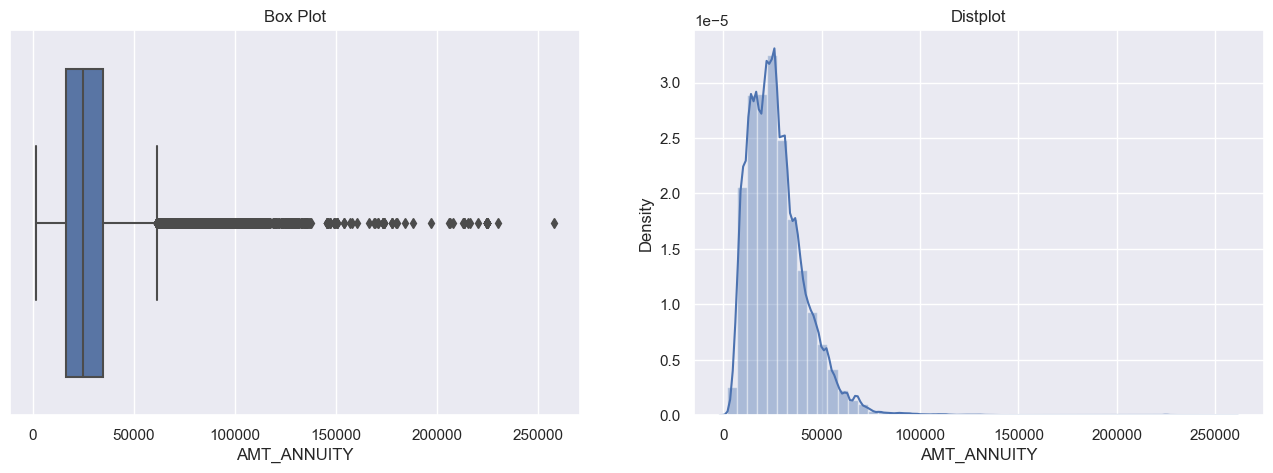

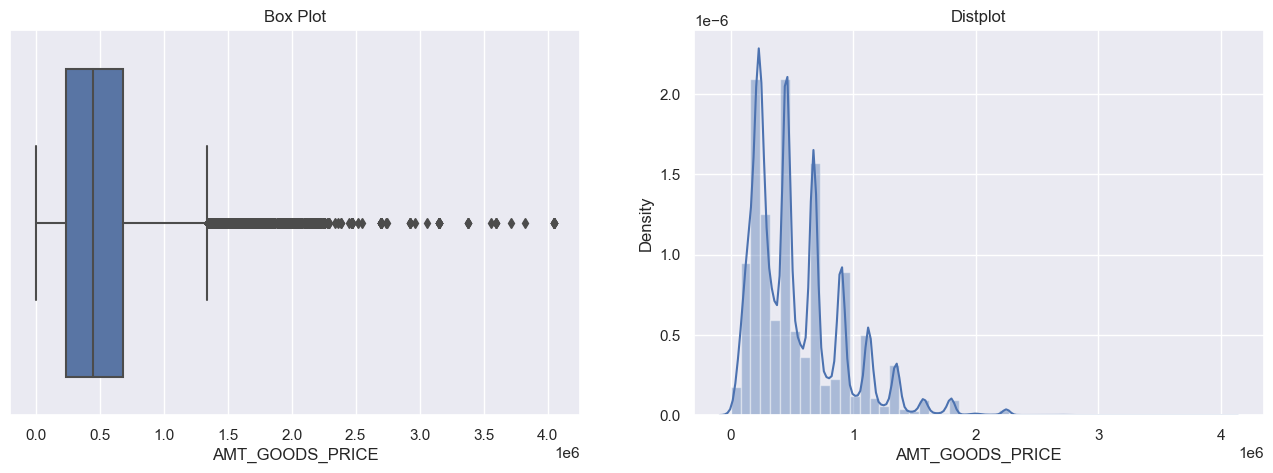

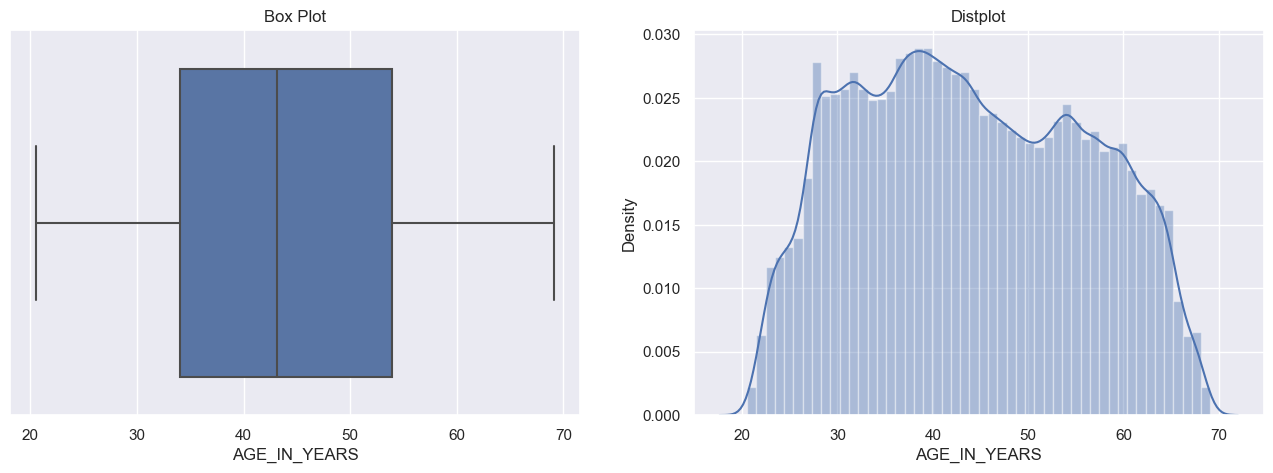

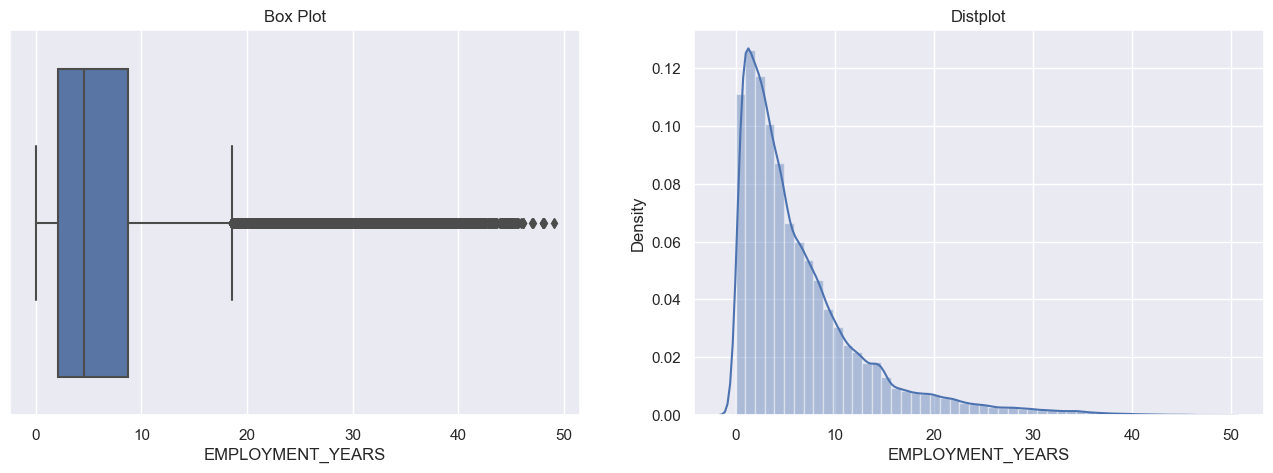

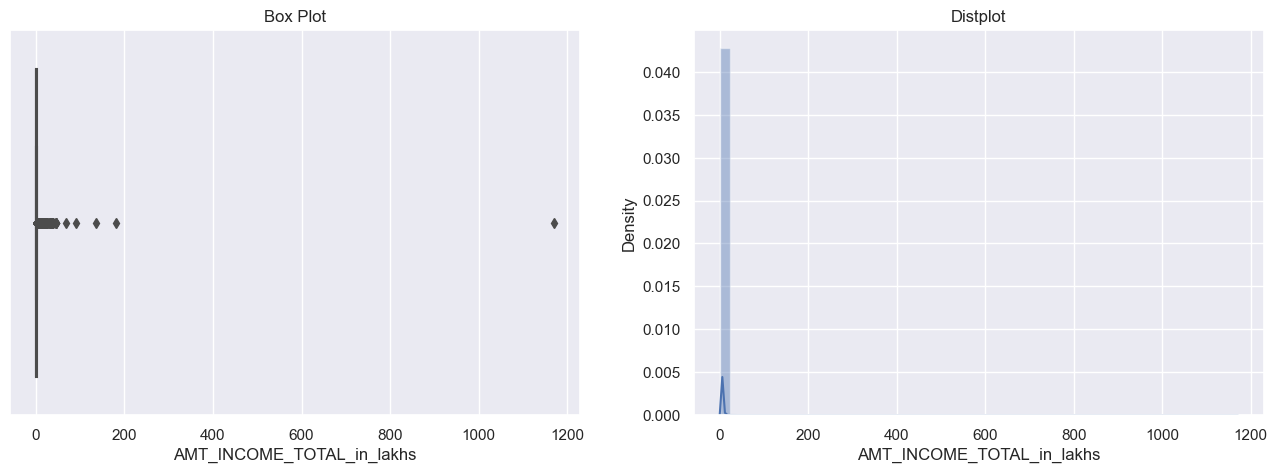

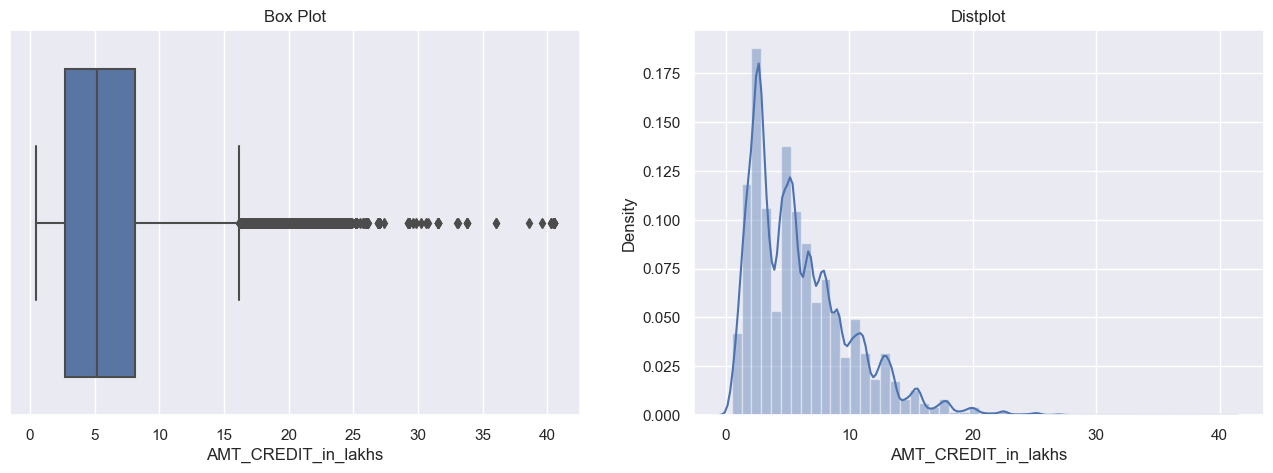

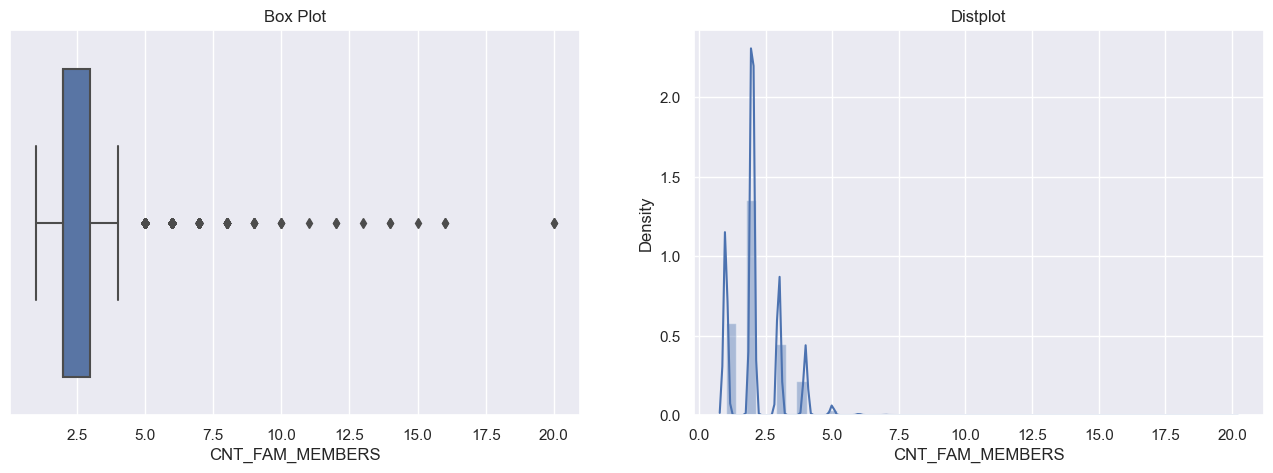

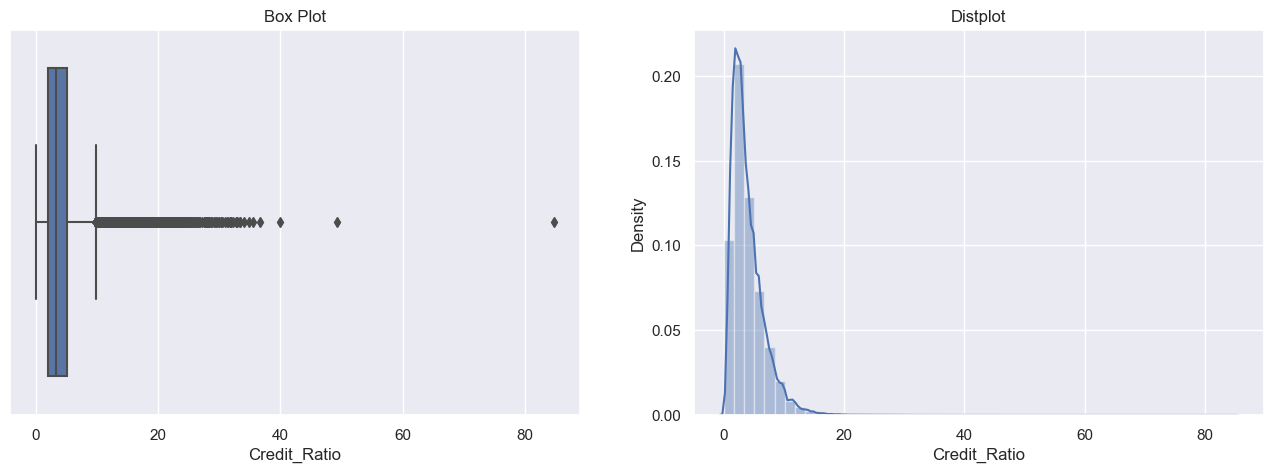

In [40]:
def Uni_Analysis_Categorcal(dataframe, column): 
    sns.set(style='darkgrid')
    plt.figure(figsize = [12,5])
    dataframe[column].value_counts().plot.barh(width = 0.8)
    plt.title(column)
    plt.show()
for i in Numarical_Data:
    Uni_Analysis_Numarical(df_application,i)

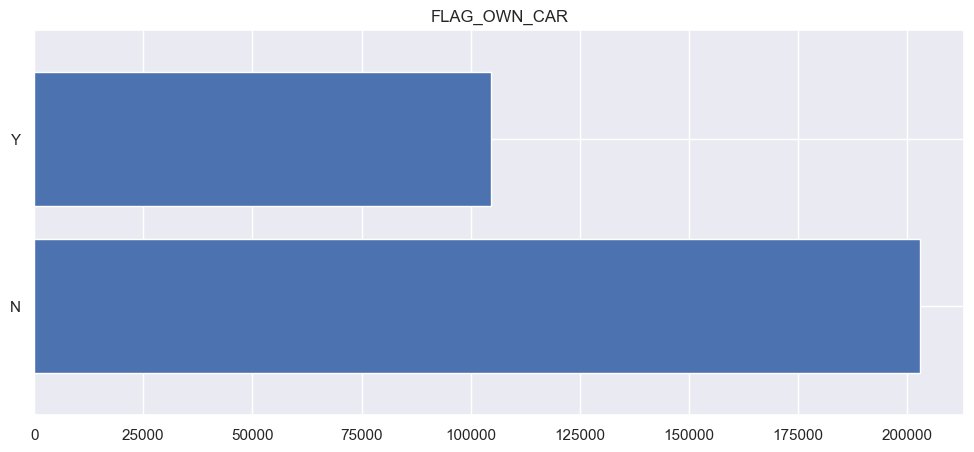

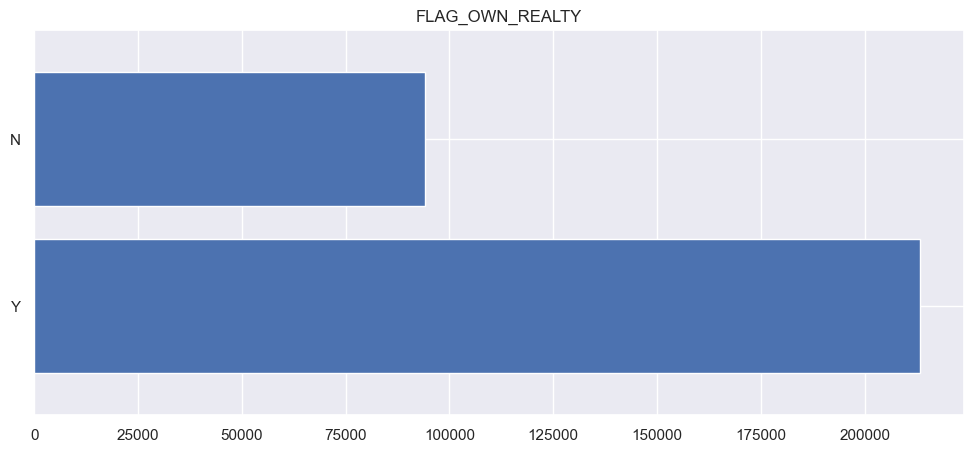

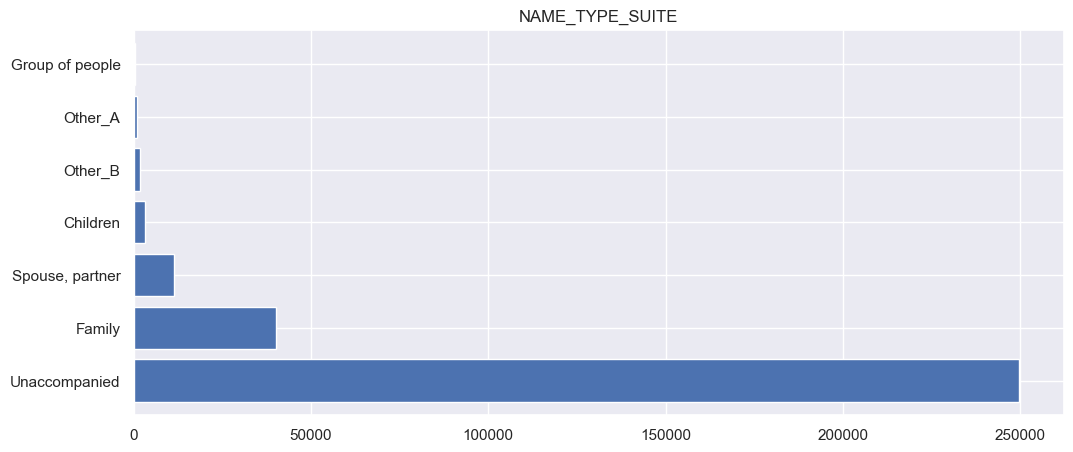

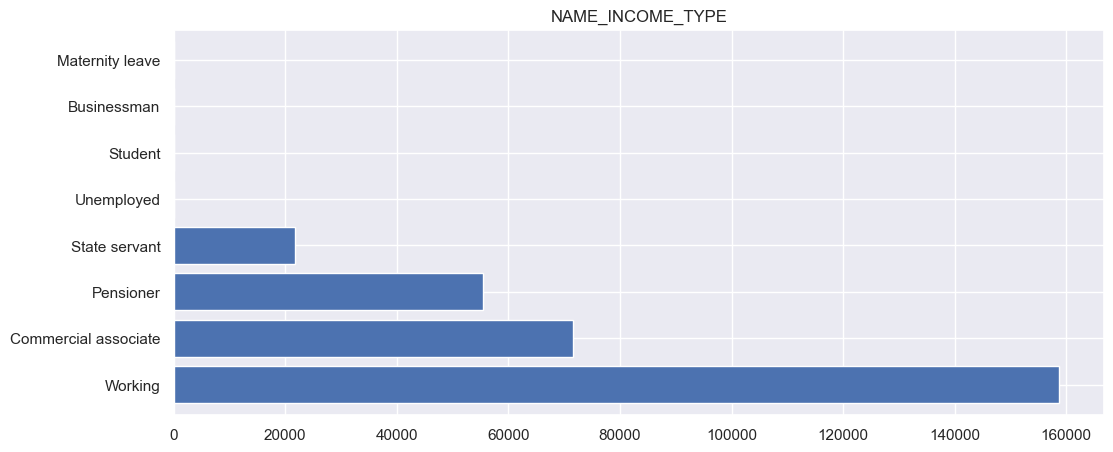

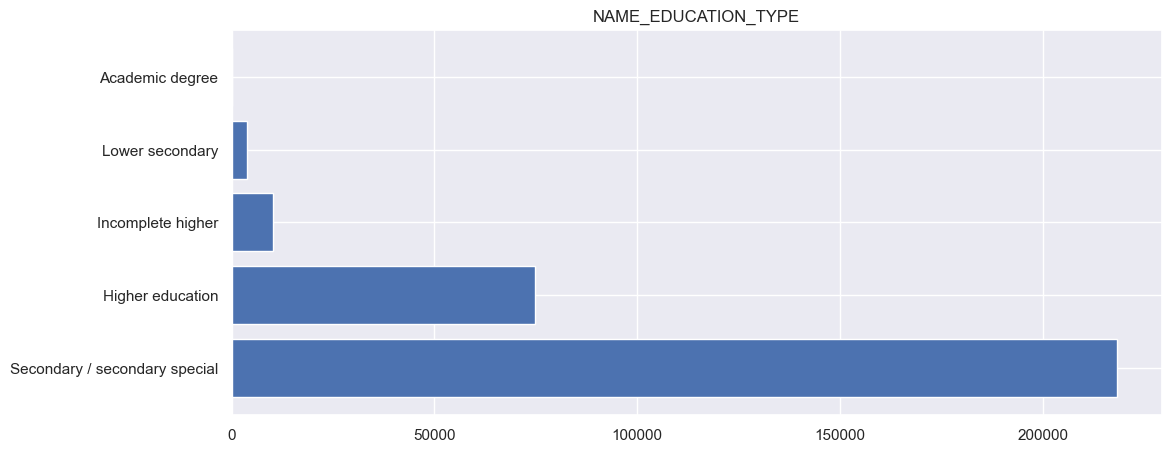

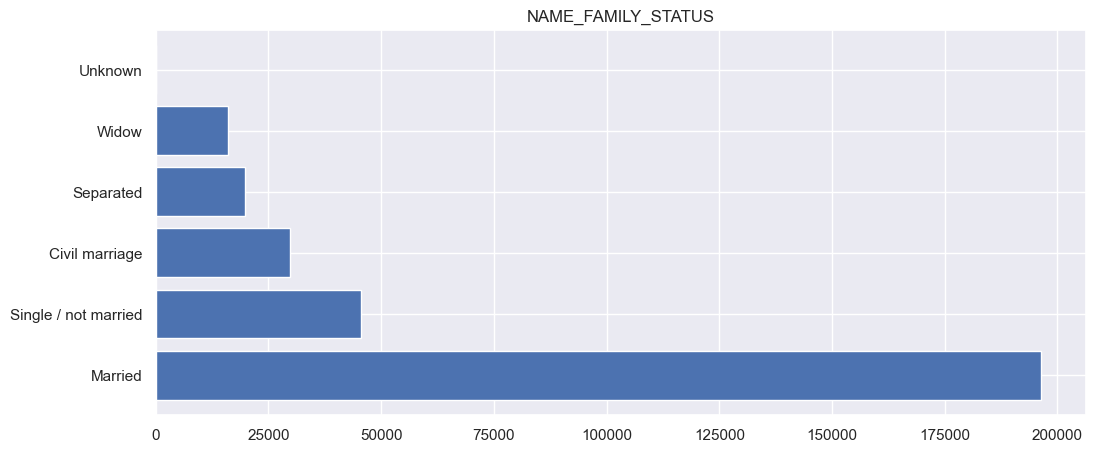

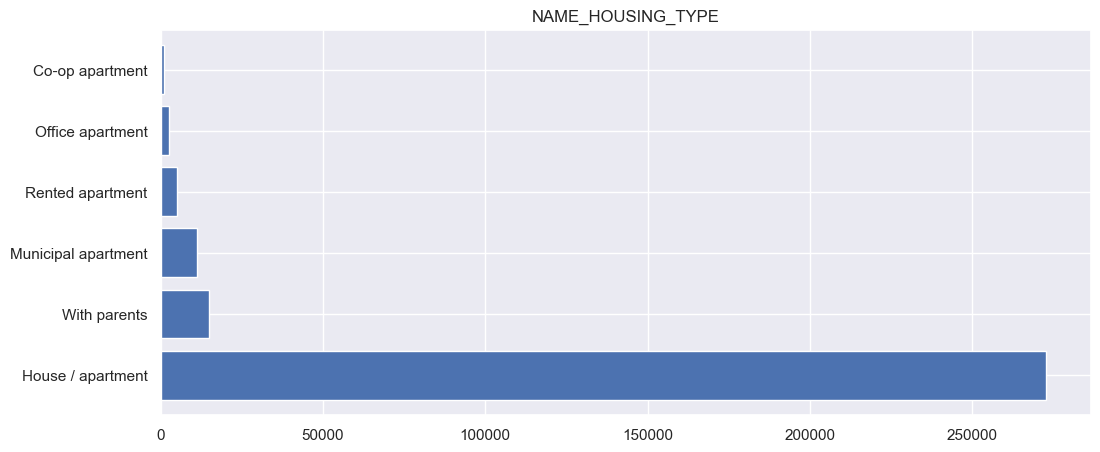

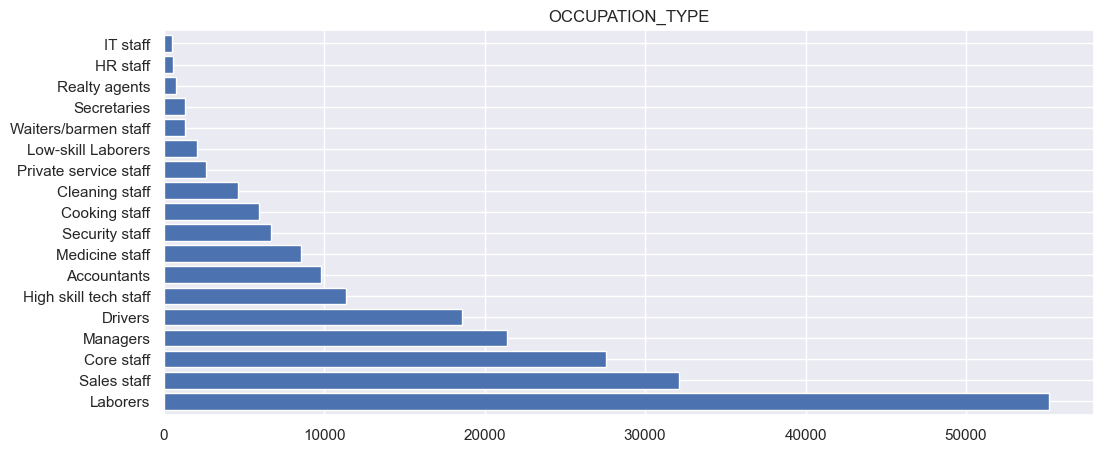

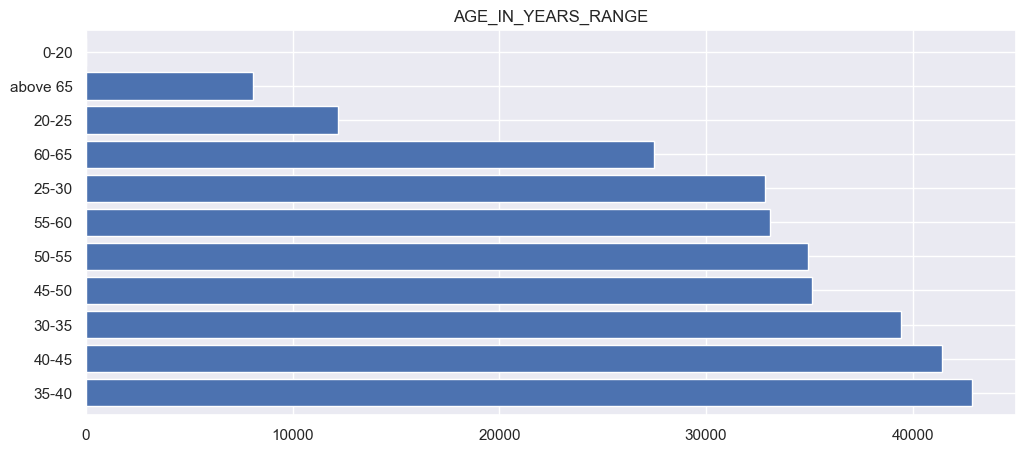

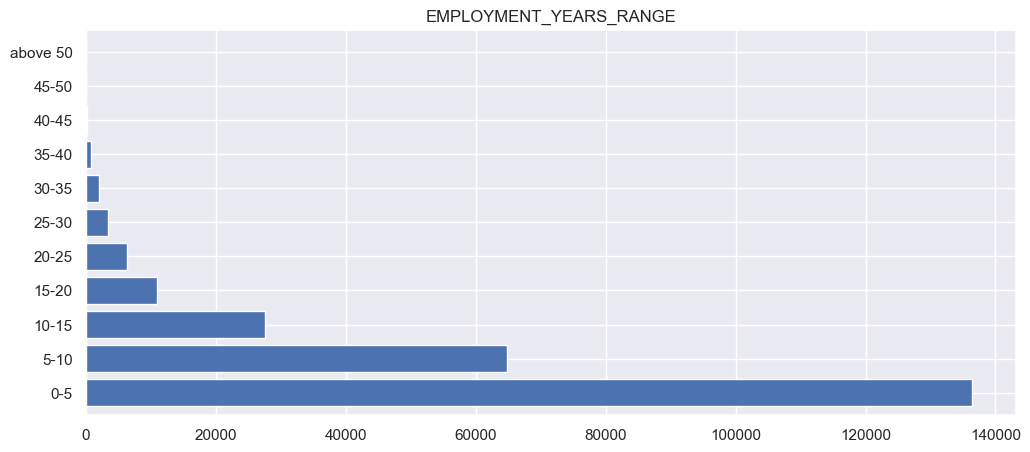

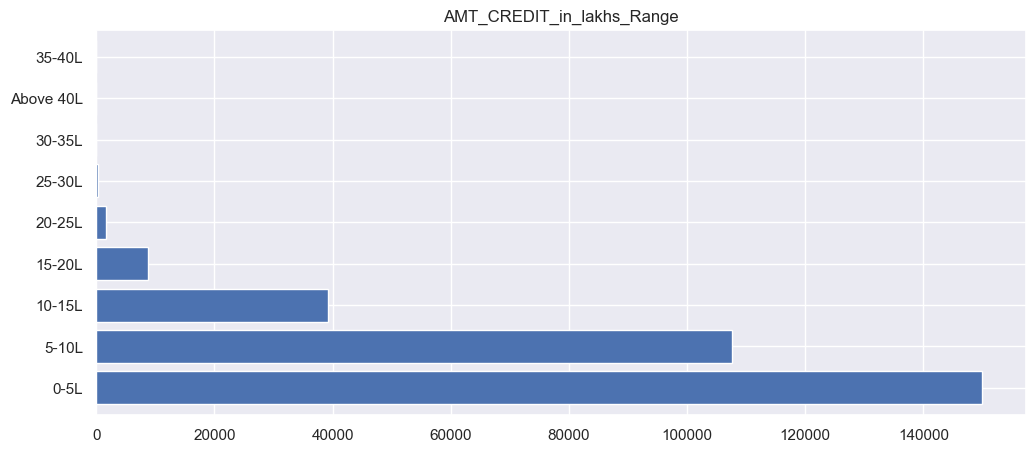

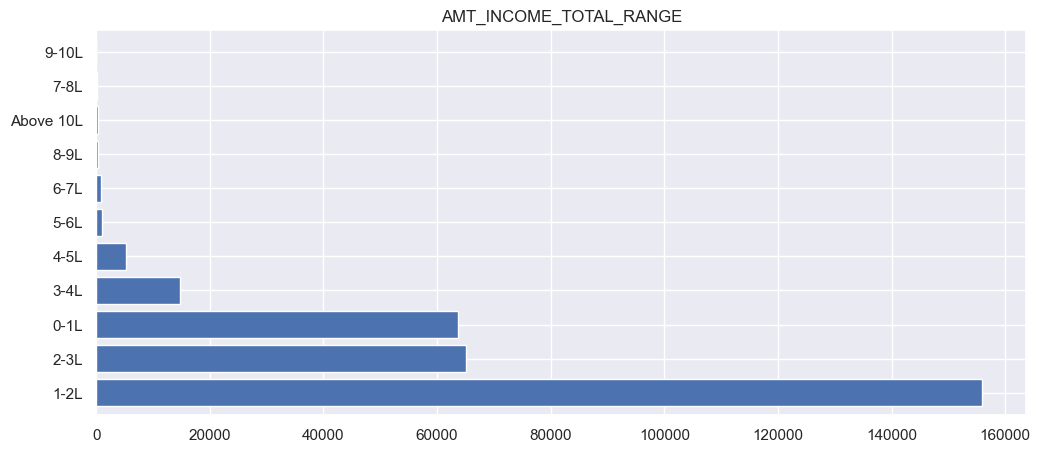

In [41]:
for i in Categorical_Data:
    Uni_Analysis_Categorcal(df_application,i)

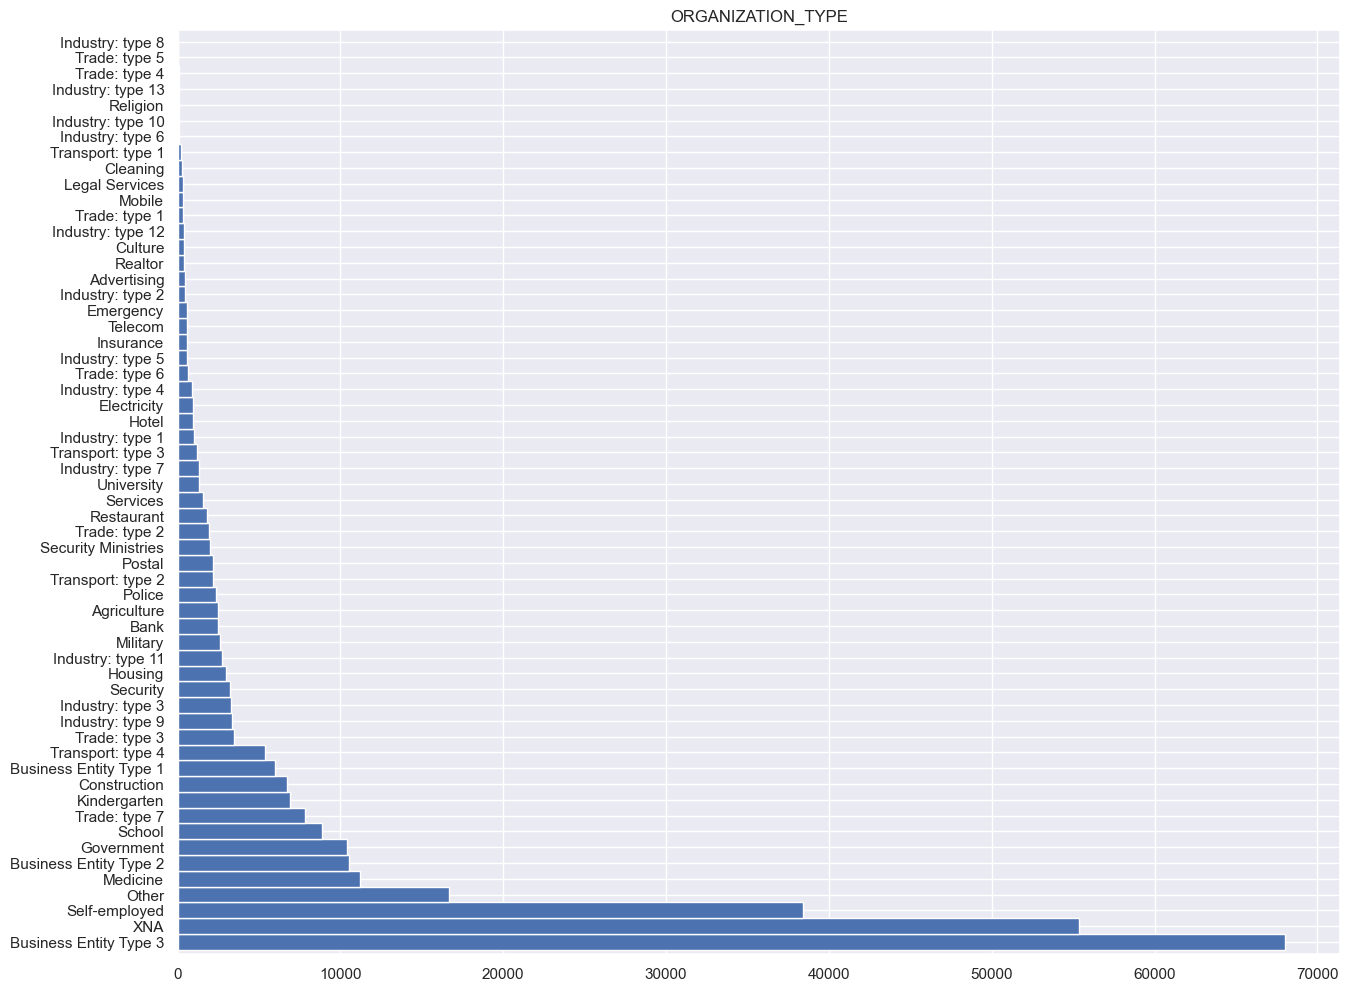

In [42]:
sns.set(style='darkgrid')
plt.figure(figsize = [15,12])
df_application['ORGANIZATION_TYPE'].value_counts().plot.barh(width = 1)
plt.title('ORGANIZATION_TYPE')
plt.show()

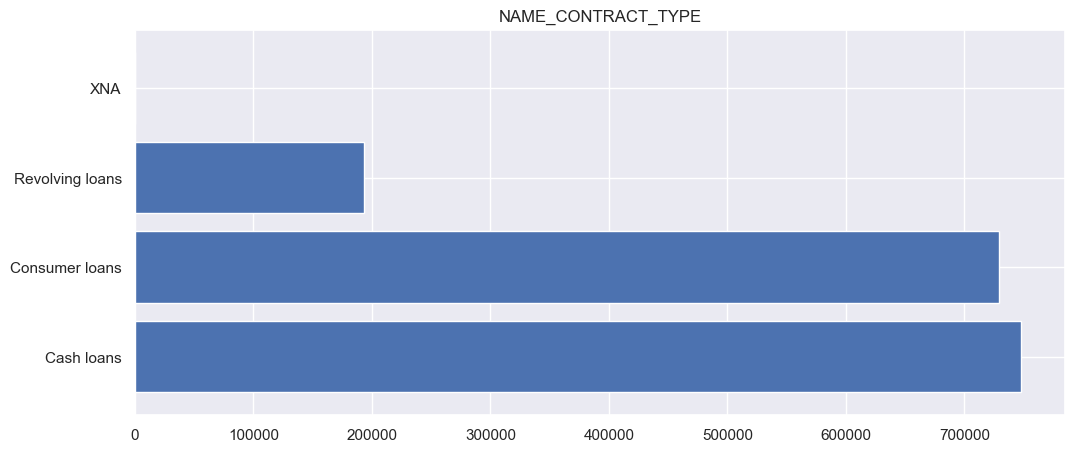

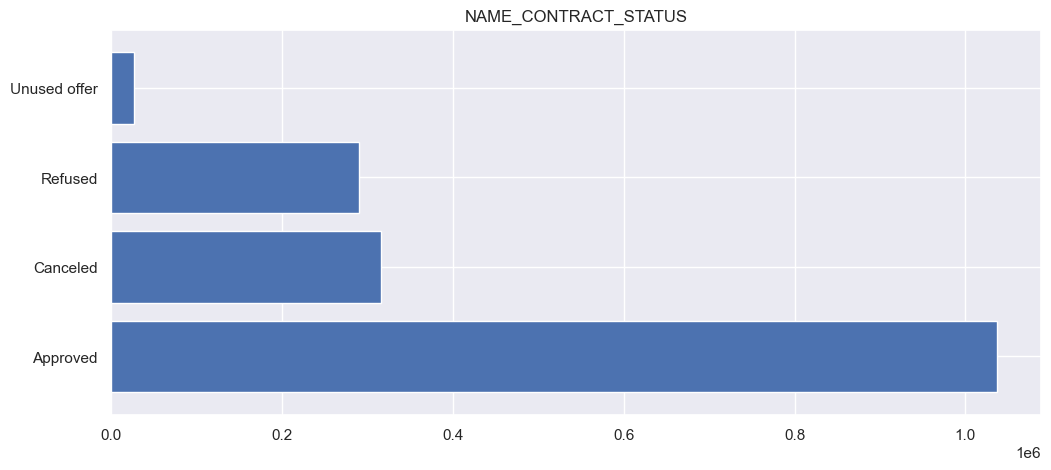

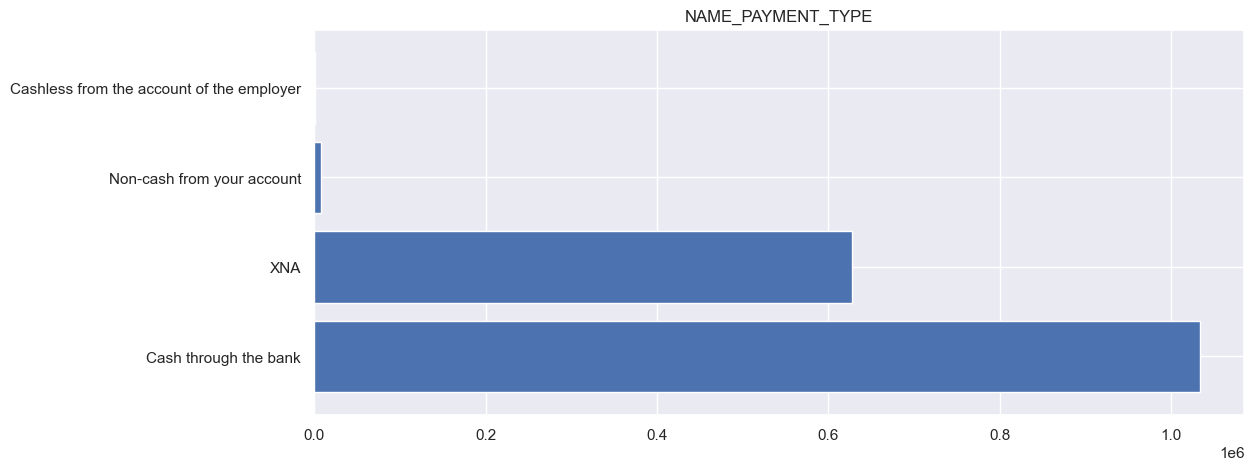

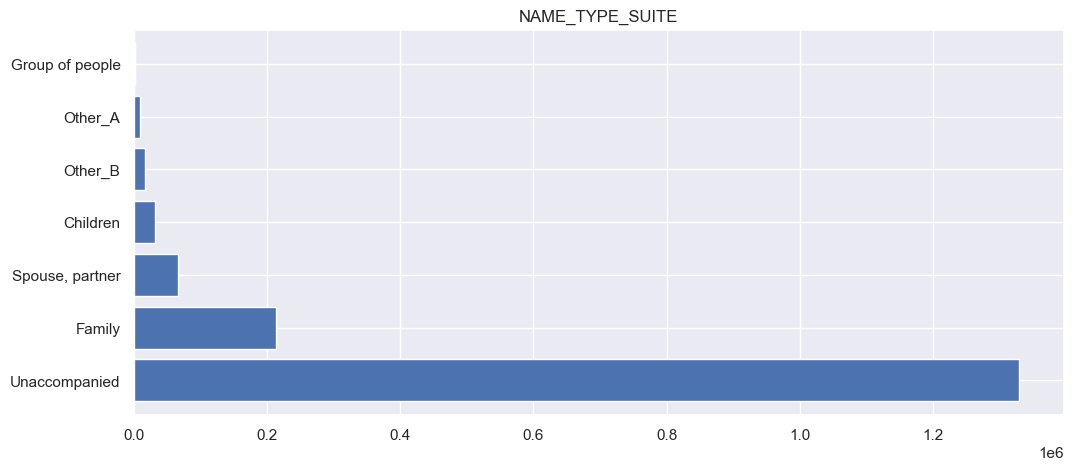

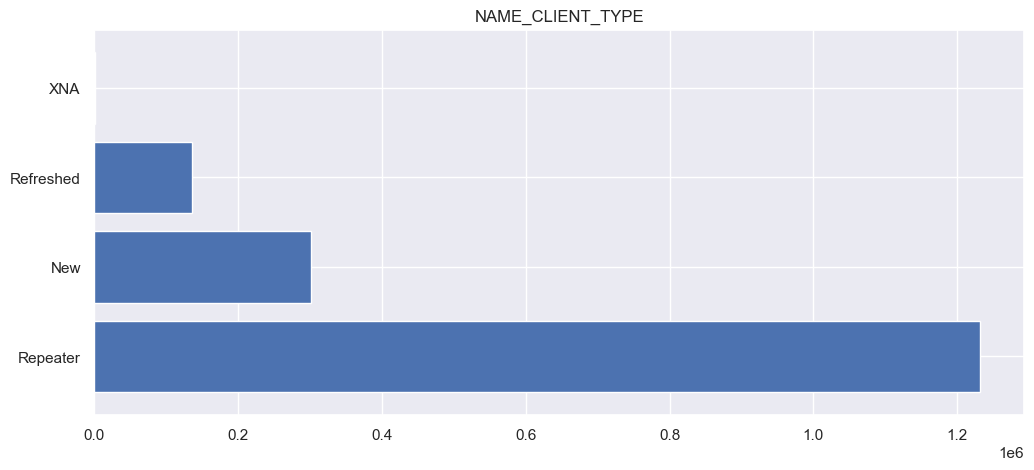

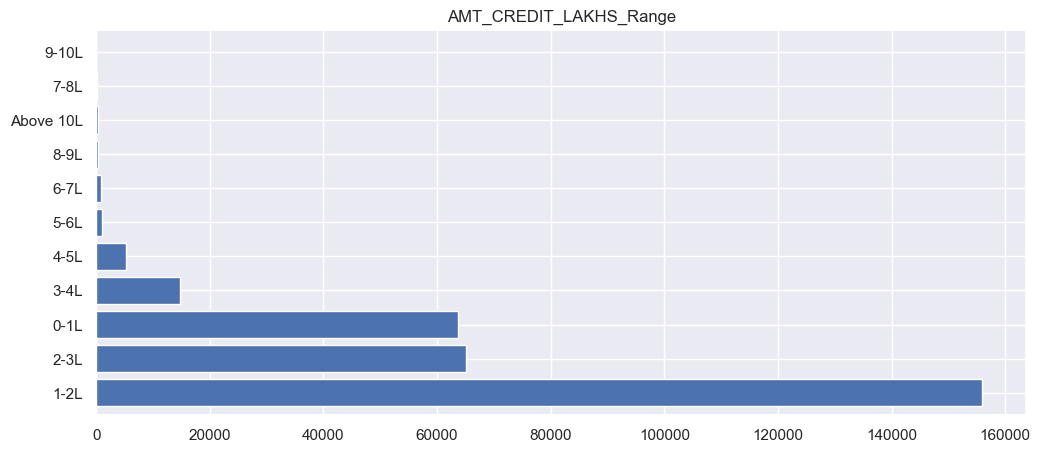

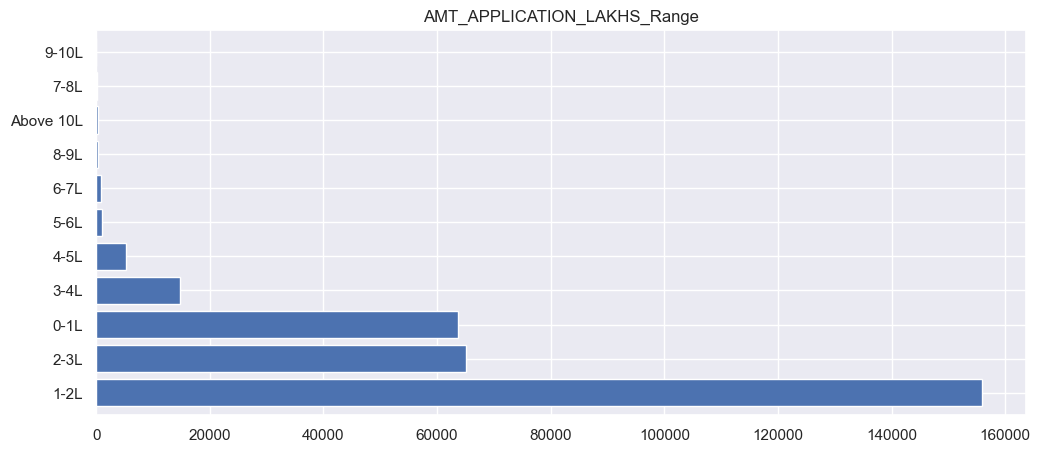

In [43]:
Categorical_Data_for_prev = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE',
'NAME_CLIENT_TYPE','AMT_CREDIT_LAKHS_Range','AMT_APPLICATION_LAKHS_Range']
for i in Categorical_Data_for_prev:
    Uni_Analysis_Categorcal(df_previous_application,i)

In [44]:
Categorical_Data_1 = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_IN_YEARS_RANGE',
'EMPLOYMENT_YEARS_RANGE','AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']

In [45]:
Numarical_Data_1 =['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Credit_Ratio']
Tagget_Variable_Payment_Difficulty = df_application[df_application.TARGET == 1]
Tagget_Variable_All_Other = df_application[df_application.TARGET ==0]
Tagget_Variable_All_Other.CODE_GENDER.value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

In [46]:
def Tagget_categorical_Uni(variable):
    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    sns.countplot(x=variable,data=Tagget_Variable_Payment_Difficulty,linewidth=1,ax=ax1,edgecolor=sns.color_palette("dark", 3),hue =variable )
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {variable} Tagget Payment_Difficulty',fontsize=18)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

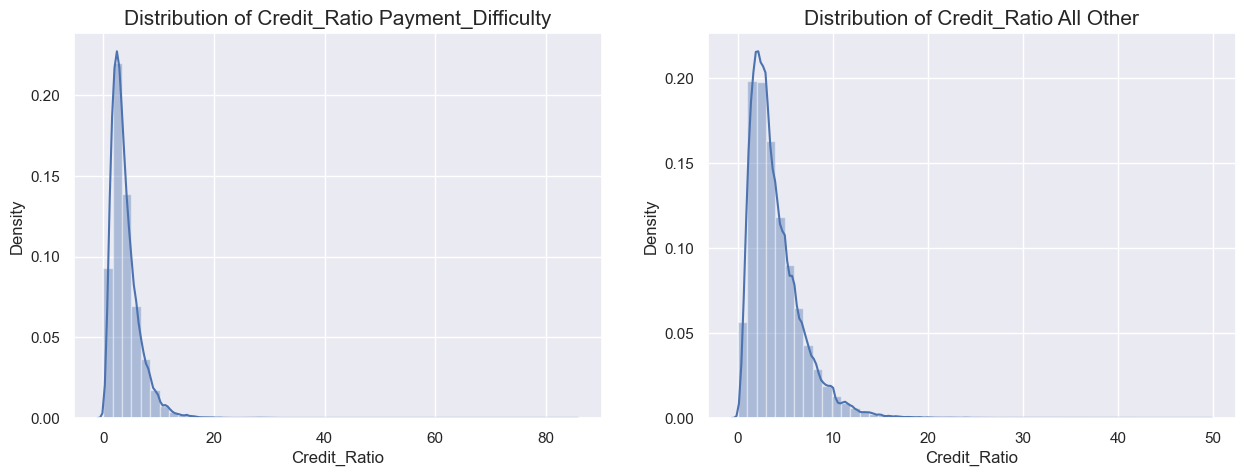

In [47]:
def Tagget_Numarical_Uni(variable):
    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(Tagget_Variable_Payment_Difficulty[variable].dropna())
    plt.title(f'Distribution of {variable} Payment_Difficulty',fontsize=15)
    plt.xlabel(variable)
    plt.subplot(1, 2, 2)
    sns.distplot(Tagget_Variable_All_Other[variable].dropna())
    plt.title(f'Distribution of {variable} All Other',fontsize=15)
    plt.xlabel(variable)
    plt.show()
Tagget_Numarical_Uni('Credit_Ratio')

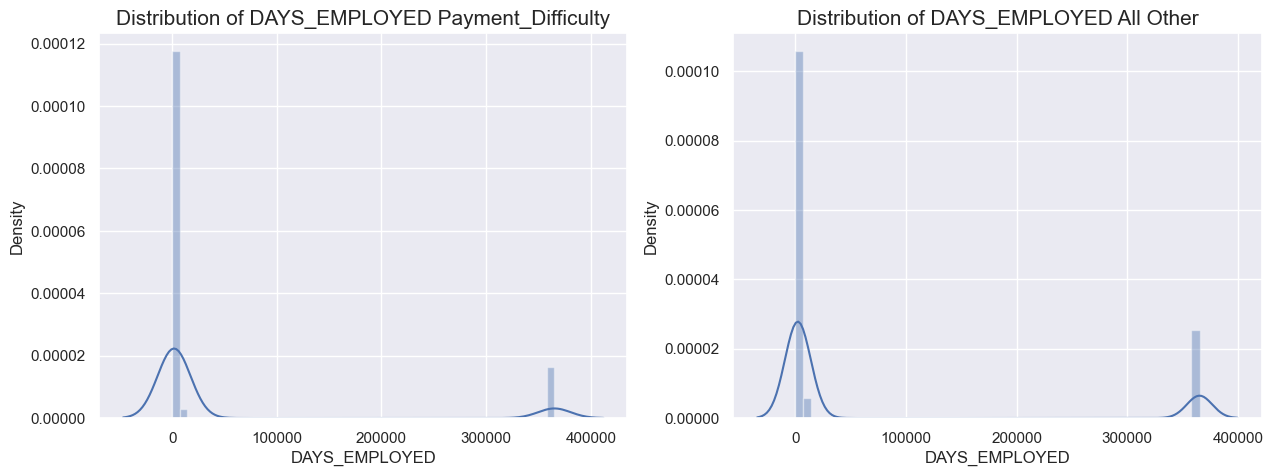

In [48]:
Tagget_Numarical_Uni('DAYS_EMPLOYED')

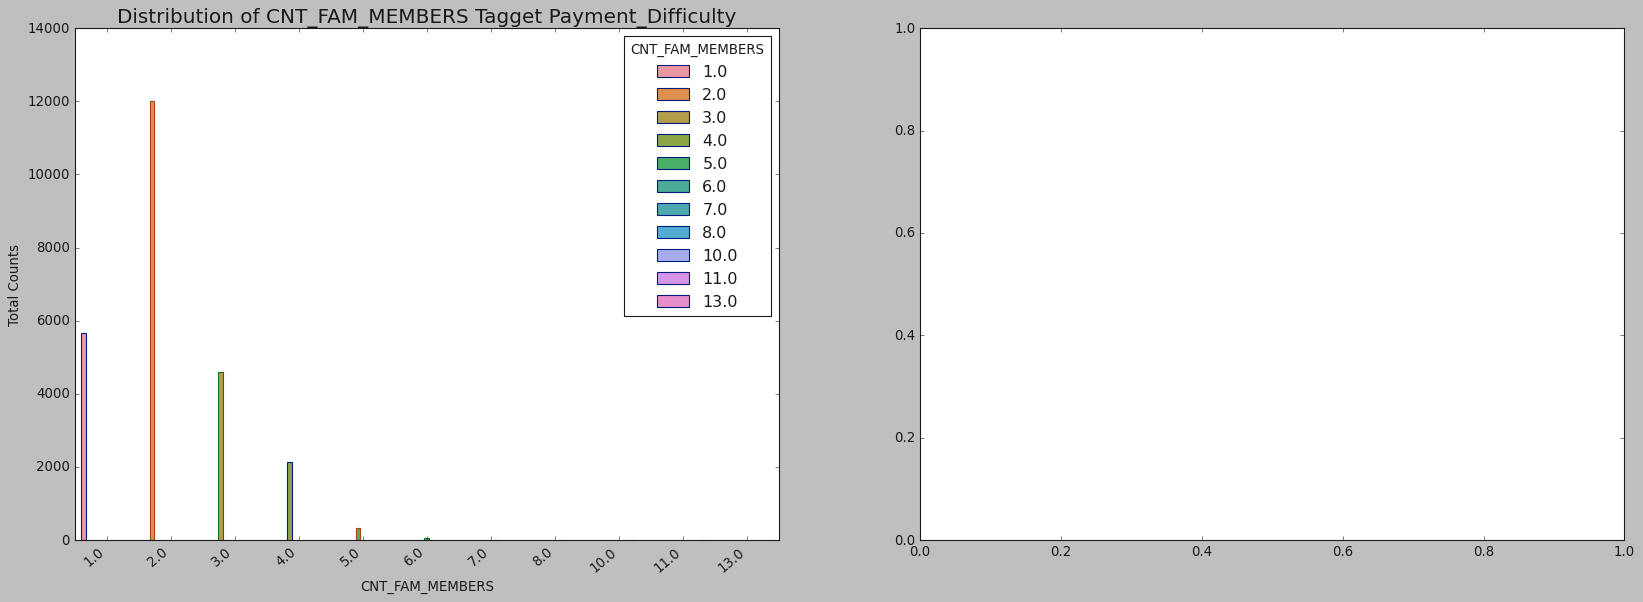

In [49]:
Tagget_categorical_Uni('CNT_FAM_MEMBERS')

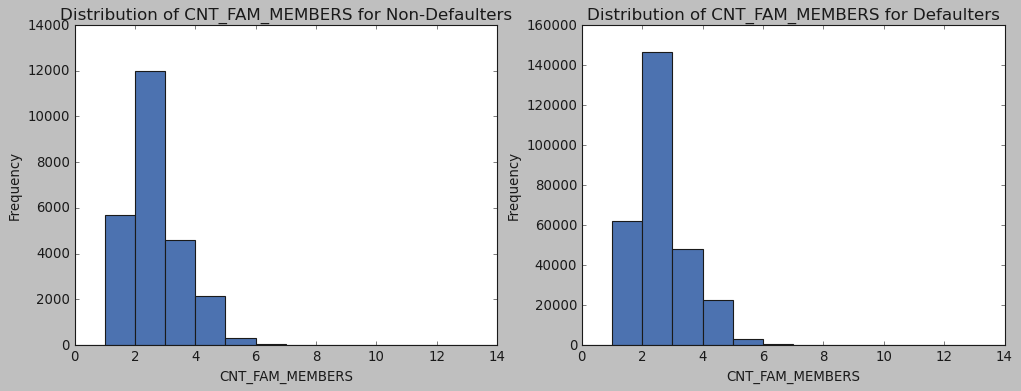

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
Tagget_Variable_Payment_Difficulty['CNT_FAM_MEMBERS'].plot.hist(
bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.subplot(1, 2, 2)
Tagget_Variable_All_Other['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.show()

# Bivariate Analysis of TARGET

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_GOODS_PRICE'>

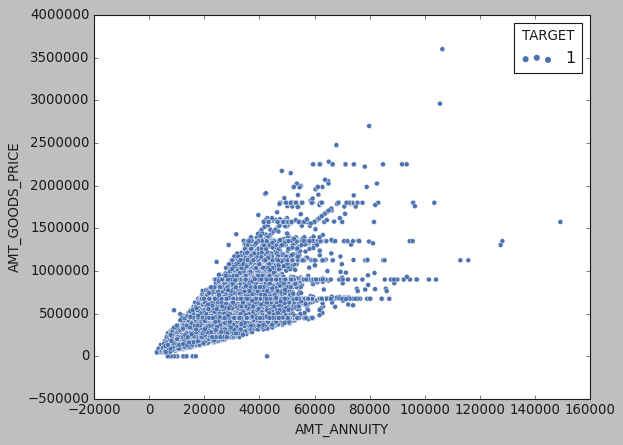

In [51]:
sns.scatterplot(x=Tagget_Variable_Payment_Difficulty.AMT_ANNUITY,y = Tagget_Variable_Payment_Difficulty.AMT_GOODS_PRICE,
data=Tagget_Variable_Payment_Difficulty,hue = 'TARGET')

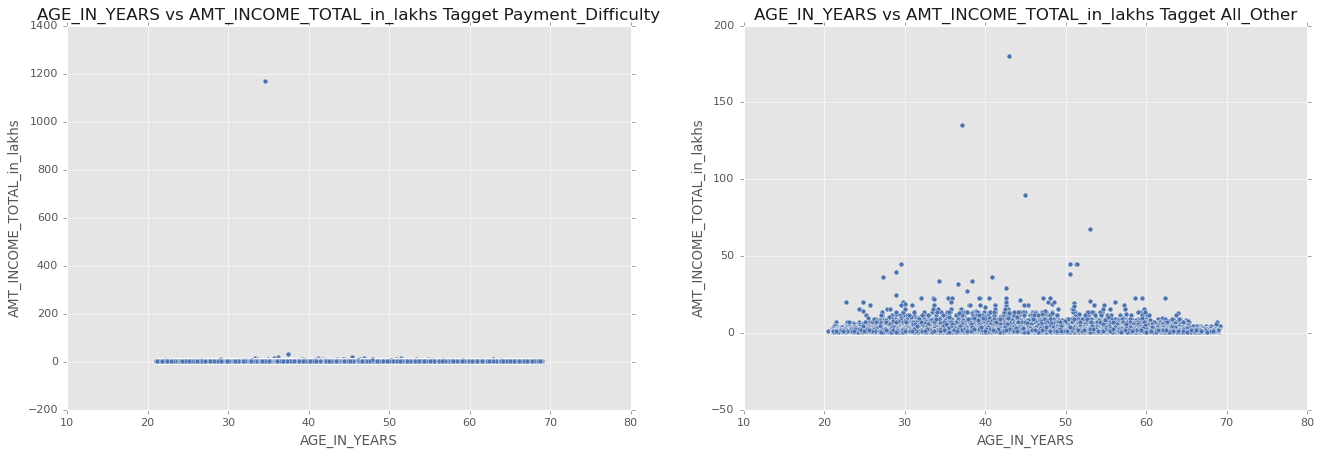

In [52]:
def Tagget_Numarical_Bi(variable_1, variable_2):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    sns.scatterplot(x=variable_1,y=variable_2,data=Tagget_Variable_Payment_Difficulty,ax=ax1)
    ax1.set_xlabel(variable_1)
    ax1.set_ylabel(variable_2)
    ax1.set_title(f'{variable_1} vs {variable_2} Tagget Payment_Difficulty',fontsize=15)
    sns.scatterplot(x=variable_1,
    y=variable_2,data=Tagget_Variable_All_Other,ax=ax2)
    ax2.set_xlabel(variable_1)
    ax2.set_ylabel(variable_2)
    ax2.set_title(f'{variable_1} vs {variable_2} Tagget All_Other',fontsize=15)
    plt.show()
Tagget_Numarical_Bi('AGE_IN_YEARS','AMT_INCOME_TOTAL_in_lakhs')

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_GOODS_PRICE'>

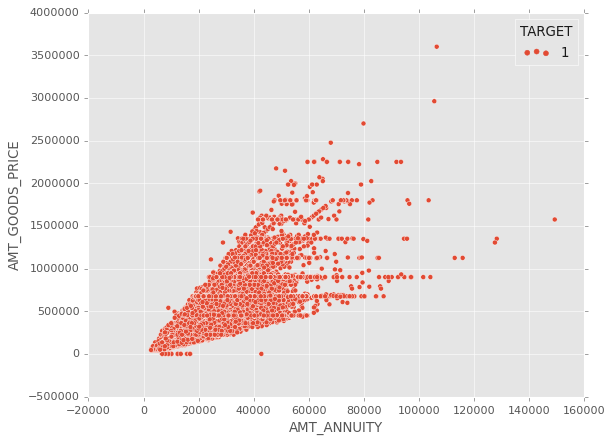

In [53]:
sns.scatterplot(x=Tagget_Variable_Payment_Difficulty.AMT_ANNUITY,y = Tagget_Variable_Payment_Difficulty.AMT_GOODS_PRICE,data=Tagget_Variable_Payment_Difficulty,hue = 'TARGET')

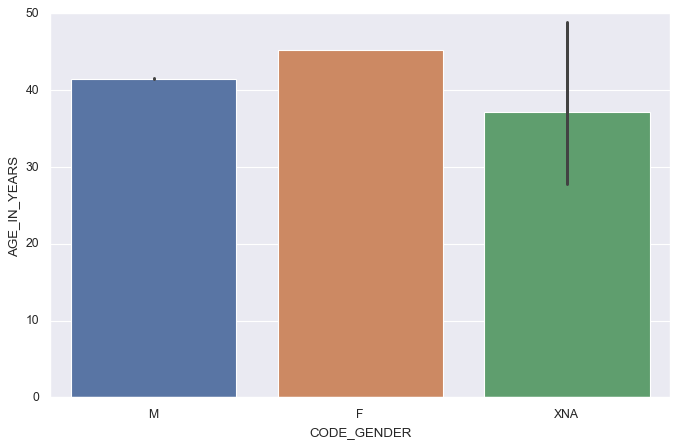

In [54]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = df_application.CODE_GENDER,y =df_application.AGE_IN_YEARS)
plt.show()

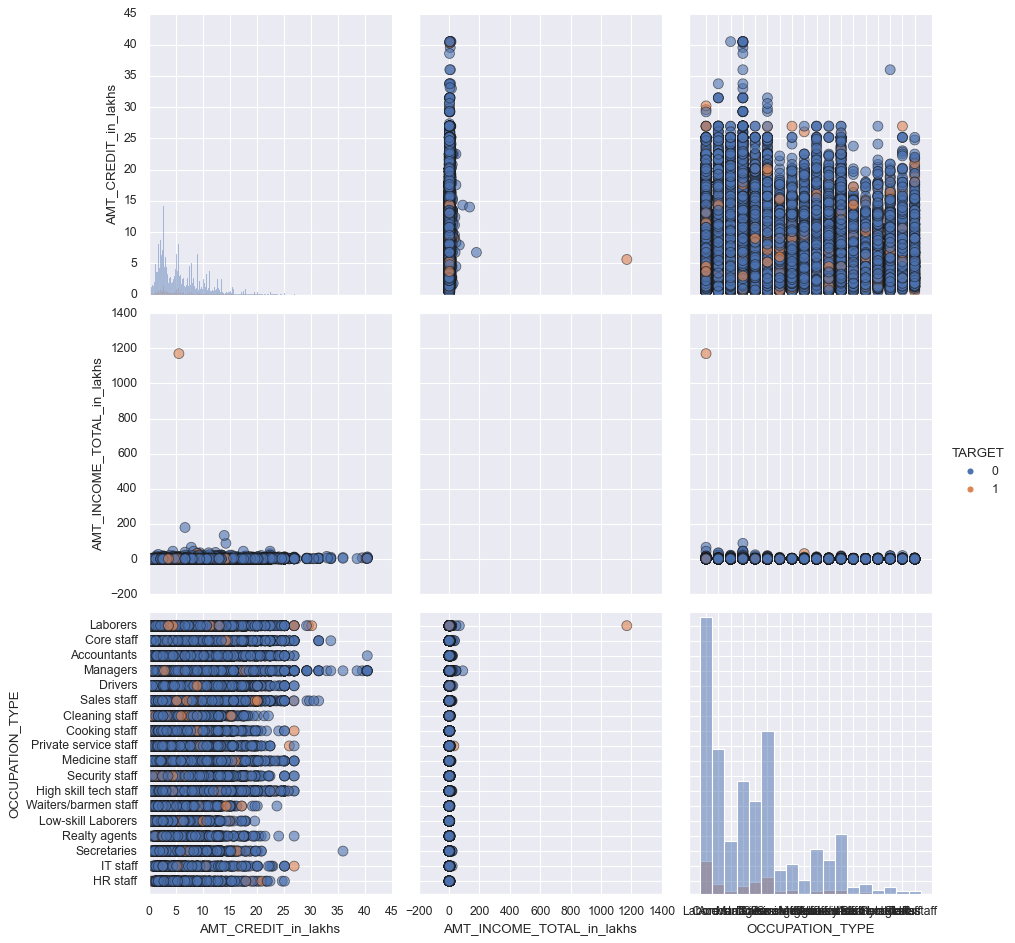

In [55]:
sns.pairplot(df_application,vars = ['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','OCCUPATION_TYPE'],diag_kind = 'hist', hue = 'TARGET',plot_kws = {'alpha':0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

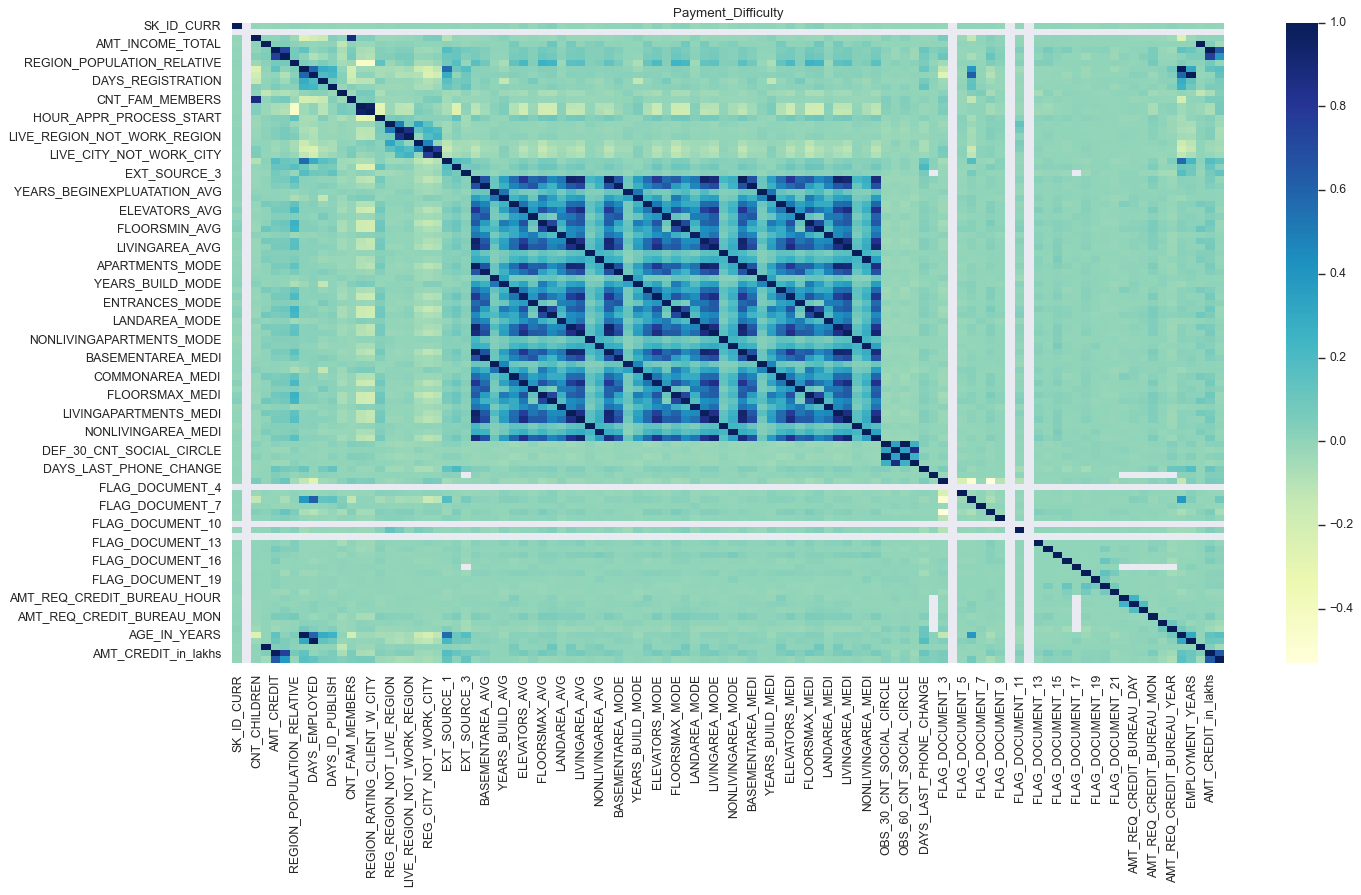

In [56]:
plt.figure(figsize=(20, 10))
sns.heatmap(Tagget_Variable_Payment_Difficulty.corr(),cmap="YlGnBu")
plt.title('Payment_Difficulty')
plt.show()

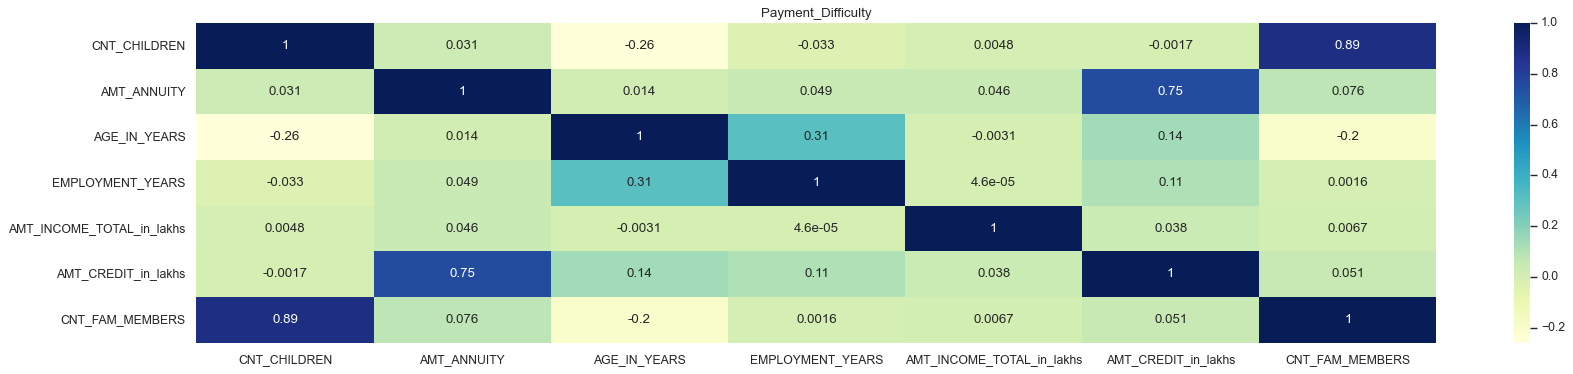

In [57]:
df_3=Tagget_Variable_Payment_Difficulty[['CNT_CHILDREN','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS',
                                         'EMPLOYMENT_YEARS','AMT_INCOME_TOTAL_in_lakhs','AMT_CREDIT_in_lakhs',
                                         'CNT_FAM_MEMBERS','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                                         'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                         'OCCUPATION_TYPE','NAME_HOUSING_TYPE']]
plt.figure(figsize=(25, 5))
sns.heatmap(df_3.corr(method = 'pearson'),cmap = 'YlGnBu',annot=True)
plt.title('Payment_Difficulty')
plt.show()